# Complexity Algorithm

### 0. Setup

In [1]:
import random
import time
import matplotlib.pyplot as plt

## 1 Sorting Algorithms (Implementation)

### 1.1 Insertion Sort

Insertion sort is a simple sorting algorithm that works by iteratively inserting each element of an unsorted list into its correct position in a sorted portion of the list. It is like sorting playing cards in your hands. You split the cards into two groups: the sorted cards and the unsorted cards. Then, you pick a card from the unsorted group and put it in the right place in the sorted group.

In [8]:
def insertion_sort(arr):
    """
    Sorts an array using the Insertion Sort algorithm.

    Instructions:
    Fill in the missing code marked with TODO.

    Time Complexity:
        Best: O(n)
        Average/Worst: O(n^2)
    Space Complexity: O(1)
    """
    # Make a copy to avoid modifying the original array
    a = arr.copy()

    # Outer loop: iterate over each element starting from index 1
    for i in range(1, len(a)):
        # TODO: Store the element to be inserted
        key = a[i]

        # TODO: Initialize j to point to the element before key
        j = i - 1

        # Inner loop: shift elements that are greater than key to the right
        while j >= 0 and a[j] > key:  # <-- Replace with your condition if needed
            # TODO: Shift element to the right
            a[j + 1] = a[j]
            j -= 1
        # TODO: Insert key at its correct position
        a[j + 1] = key

    return a  # <-- Return the sorted array

### 1.2 Selection Sort

Selection Sort is a comparison-based sorting algorithm. It sorts by repeatedly selecting the smallest (or largest) element from the unsorted portion and swapping it with the first unsorted element.

In [10]:
def selection_sort(arr):
    """
    Sorts an array using the Selection Sort algorithm.

    Instructions:
    Fill in the missing code marked with TODO.

    Time Complexity: O(n^2) in all cases
    Space Complexity: O(1)
    """
    # Make a copy to avoid modifying the original array
    a = arr.copy()
    n = len(a)

    # Outer loop: move boundary of unsorted array
    for i in range(n - 1):
        # TODO: Initialize min_index to the first element of the unsorted part
        min_index = i

        # Inner loop: find the minimum element in the unsorted part
        for j in range(i + 1, n):
            # TODO: Check if current element is smaller than current minimum
            if a[j] < a[min_index]:  # <-- Replace with your condition
                # TODO: Update min_index to the index of the new minimum
                min_index = j

        # TODO: Swap the found minimum element with the first unsorted element
        a[i], a[min_index] = a[min_index], a[i] # <-- Replace with your code if needed

    return a  # <-- Return the sorted array

### 1.3 Bubble Sort

Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in the wrong order. This algorithm is not efficient for large data sets as its average and worst-case time complexity are quite high.

In [12]:
def bubble_sort(arr):
    """
    Sorts an array using the Bubble Sort algorithm.

    Instructions:
    Fill in the missing code marked with TODO.

    Time Complexity:
        Best: O(n) (with early stopping)
        Average/Worst: O(n^2)
    Space Complexity: O(1)
    """
    # Make a copy to avoid modifying the original array
    a = arr.copy()
    n = len(a)

    # Outer loop: go through each element
    for i in range(n - 1):
        swapped = False

        # Inner loop: compare adjacent elements
        for j in range(n - 1 - i):
            # TODO: Fill the condition to check if elements are in wrong order
            if a[j] > a[j+1]:  # <-- Replace with your condition if needed
                # TODO: Swap the two elements
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True

        # TODO: Implement early stopping if no swaps were made
        if not swapped:  # <-- Replace with your check if needed
            break

    return a  # <-- Return the sorted array

### 1.4 Merge Sort

Merge sort is a popular sorting algorithm known for its efficiency and stability. It follows the Divide and Conquer approach. It works by recursively dividing the input array into two halves, recursively sorting the two halves and finally merging them back together to obtain the sorted array.

In [13]:
def merge_sort(arr):
    """
    Sorts an array using the Merge Sort algorithm.
    Time Complexity: O(n log n)
    Space Complexity: O(n)
    """
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted lists into one sorted list.
    """
    result = []
    i = j = 0

    # Compare elements from both lists
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # Append remaining elements
    result.extend(left[i:])
    result.extend(right[j:])
    return result

### 1.5 Counting Sort

Counting Sort is a non-comparison-based sorting algorithm. It is particularly efficient when the range of input values is small compared to the number of elements to be sorted.

In [14]:
def counting_sort(arr):
    """
    Sorts an array of non-negative integers using Counting Sort.

    Parameters:
    arr (list of int): Input array to be sorted

    Returns:
    list of int: Sorted array
    """

    if not arr:
        return []

    # Step 1: Find the maximum value to determine the range
    k = max(arr)

    # Step 2: Initialize count array
    # C[i] will store the number of occurrences of i
    C = [0] * (k + 1)

    # Step 3: Count occurrences of each element
    for num in arr:
        C[num] += 1

    # Step 4: Compute prefix sums to get positions
    for i in range(1, k + 1):
        C[i] += C[i - 1]

    # Step 5: Build the output array (traverse arr from right to left for stability)
    B = [0] * len(arr)
    for num in reversed(arr):
        B[C[num] - 1] = num
        C[num] -= 1

    return B

## 2. Measuring Execution Time

In [15]:
def measure_time(sort_function, arr):
    """
    Measures the execution time of a sorting function.
    """
    start = time.time()
    sort_function(arr)
    end = time.time()
    return end - start

### 2.1 Execution Time Comparison

In [20]:
sizes = [1, 10, 100, 1000, 10000] # Change this values

algorithms = {
    "Insertion Sort": insertion_sort,
    "Selection Sort": selection_sort,
    "Bubble Sort": bubble_sort,
    "Merge Sort": merge_sort,
    "Couting Sort": counting_sort
}

results = {name: [] for name in algorithms}

for n in sizes:
    arr = random.sample(range(n * 10), n)
    for name, algo in algorithms.items():
        t = measure_time(algo, arr)
        results[name].append(t)

In [21]:
results

{'Insertion Sort': [3.0994415283203125e-06,
  4.0531158447265625e-06,
  0.00014495849609375,
  0.01699972152709961,
  1.7197651863098145],
 'Selection Sort': [9.5367431640625e-07,
  3.814697265625e-06,
  0.0001499652862548828,
  0.020097017288208008,
  1.9544000625610352],
 'Bubble Sort': [0.0,
  6.198883056640625e-06,
  0.0003230571746826172,
  0.03690695762634277,
  4.2891740798950195],
 'Merge Sort': [0.0,
  1.4066696166992188e-05,
  0.00016117095947265625,
  0.0015323162078857422,
  0.020300865173339844],
 'Couting Sort': [5.245208740234375e-06,
  9.059906005859375e-06,
  9.608268737792969e-05,
  0.0009489059448242188,
  0.01042795181274414]}

## 3. Visualizing Complexity

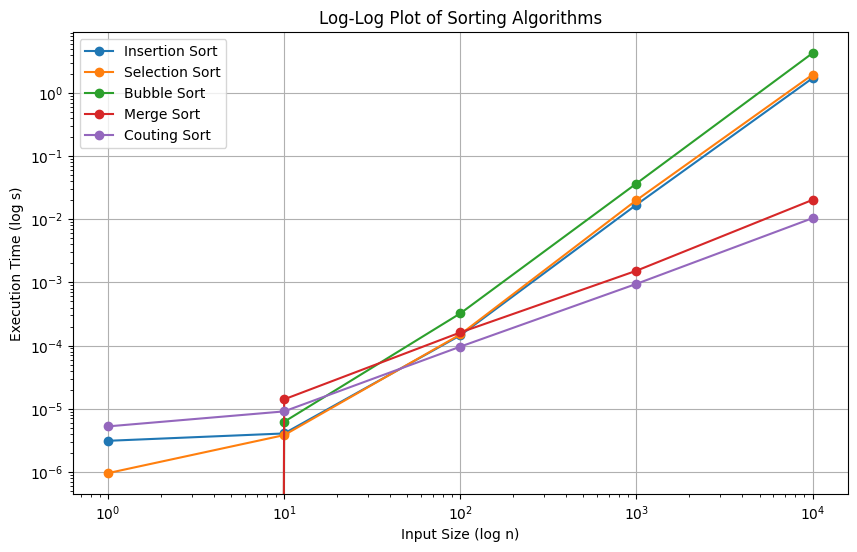

In [22]:
plt.figure(figsize=(10, 6))

for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Input Size (log n)")
plt.ylabel("Execution Time (log s)")
plt.title("Log-Log Plot of Sorting Algorithms")
plt.legend()
plt.grid(True)
plt.show()